In [1]:
from ift6758.controller.nhl_data_downloader import NHLDataDownloader

downloader = NHLDataDownloader()


In [ ]:
downloader.download_all_seasons_play_by_play(2016,2020)

FloatProgress(value=0.0, description='Loading:', max=1.0)

In [2]:
#range(2016, 2020) will download all seasons from 2016 to 2019
train_val_df = downloader.load_season_data(season_range=range(2016, 2020))
print(train_val_df.head())

Loaded regular season data from folder: 2016_CleanCSV
Loaded regular season data from folder: 2017_CleanCSV
Loaded regular season data from folder: 2018_CleanCSV
Loaded regular season data from folder: 2019_CleanCSV
Combined regular season data for seasons [2016, 2017, 2018, 2019].
      game_id   game_date  home_team_id  period time_in_period  event_id  \
0  2016020374  2016-12-04            16       1          00:37        56   
1  2016020374  2016-12-04            16       1          03:55        65   
2  2016020374  2016-12-04            16       1          04:47        68   
3  2016020374  2016-12-04            16       1          05:56        71   
4  2016020374  2016-12-04            16       1          07:50        76   

     event_type  is_goal shot_type  x_coord  ...   team_name  team_type  \
0  shot-on-goal    False  backhand     69.0  ...        Jets       away   
1  shot-on-goal    False      slap    -44.0  ...  Blackhawks       home   
2  shot-on-goal    False     wrist 

In [3]:
test_df = downloader.load_season_data(season_range=[2020])
print(test_df.head())

Loaded regular season data from folder: 2020_CleanCSV
Combined regular season data for seasons [2020].
      game_id   game_date  home_team_id  period time_in_period  event_id  \
0  2020020547  2021-03-28            25       1          00:50        55   
1  2020020547  2021-03-28            25       1          00:59        57   
2  2020020547  2021-03-28            25       1          01:47        61   
3  2020020547  2021-03-28            25       1          02:01        63   
4  2020020547  2021-03-28            25       1          04:27        66   

     event_type  is_goal shot_type  x_coord  ...  team_name  team_type  \
0  shot-on-goal    False     wrist       24  ...   Panthers       away   
1  shot-on-goal    False      slap       51  ...   Panthers       away   
2  shot-on-goal    False      slap       42  ...   Panthers       away   
3  shot-on-goal    False      slap       41  ...   Panthers       away   
4  shot-on-goal    False      snap      -72  ...      Stars       home

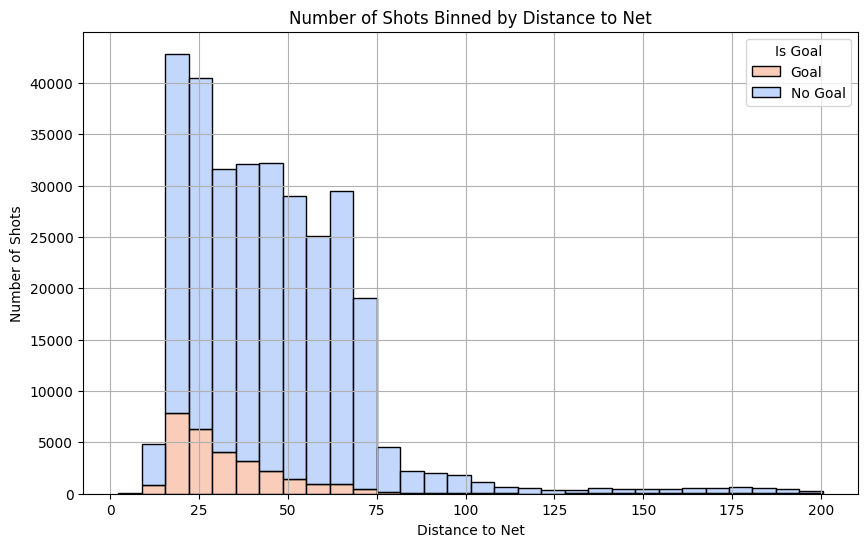

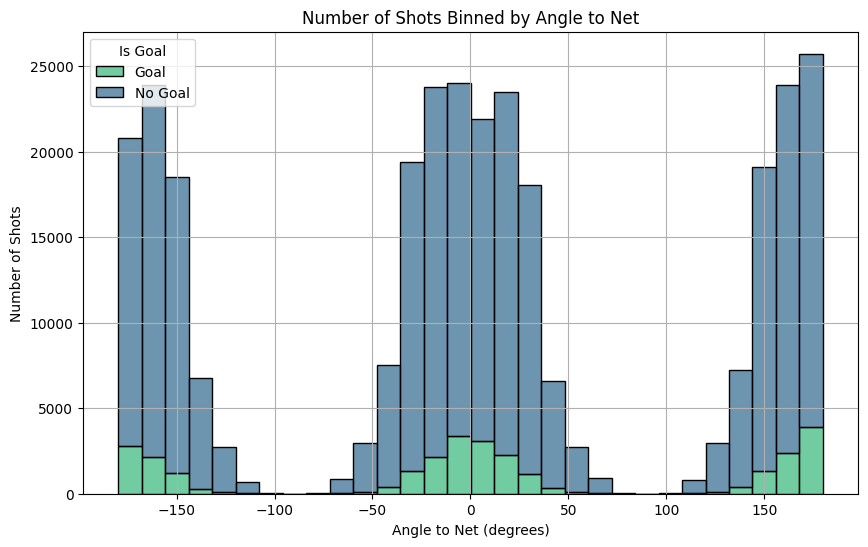

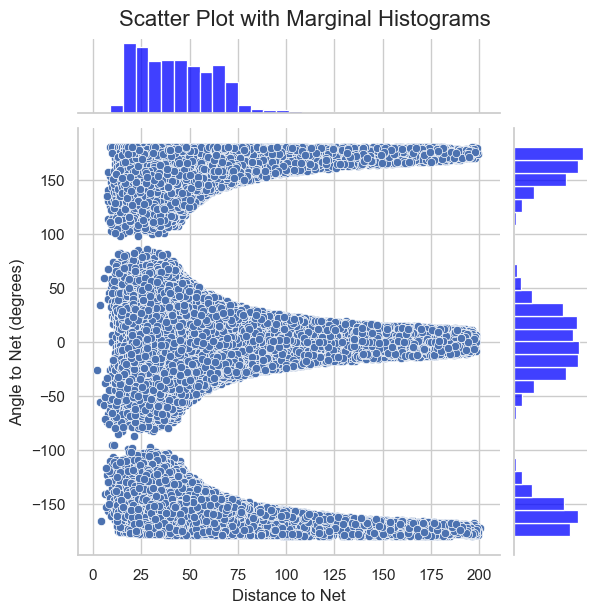

In [4]:
from ift6758.controller.nhl_shot_visualizer import NHLShotVisualizer
valid_data = train_val_df.dropna(subset=["distance_to_net", "angle_to_net"])
# Instantiate the visualizer with the processed data
visualizer = NHLShotVisualizer(valid_data )

# Generate the plots
visualizer.plot_distance_histogram()
visualizer.plot_angle_histogram()


visualizer.plot_2d_histogram_distance_angle()


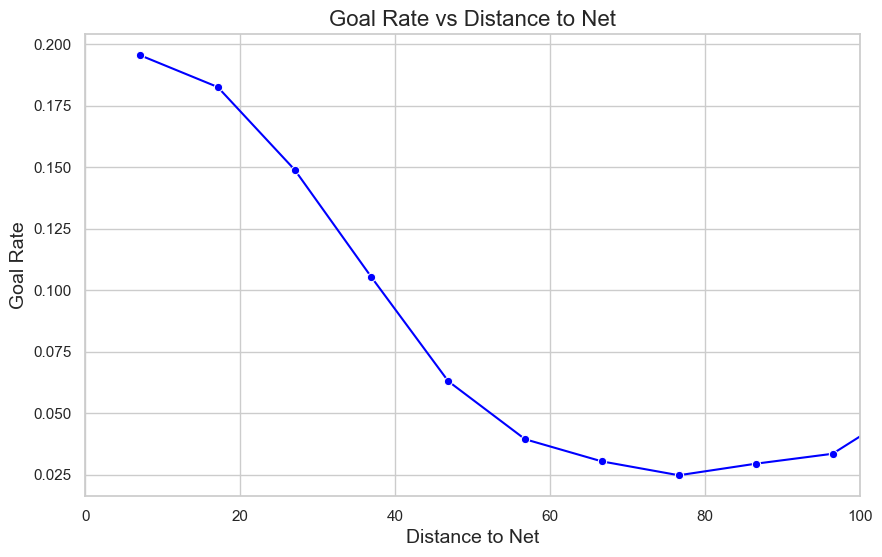

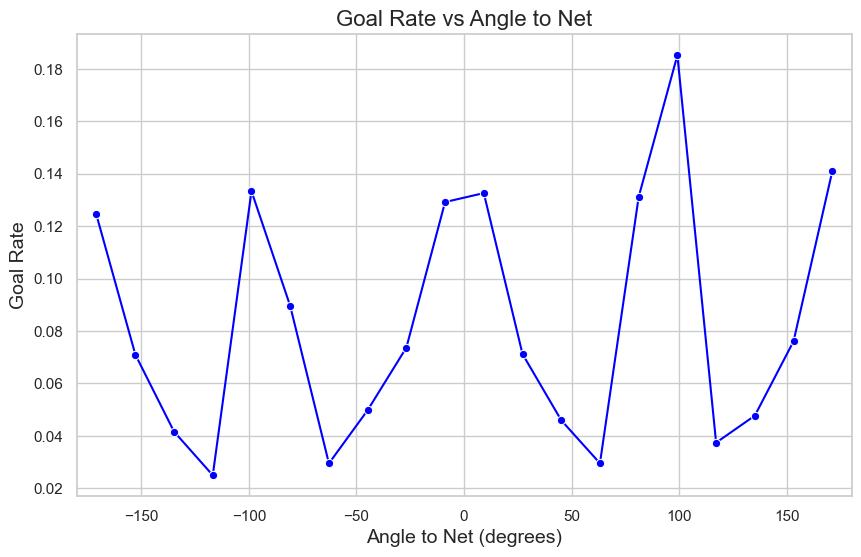

In [5]:
from ift6758.controller.nhl_shot_visualizer import NHLShotVisualizer
valid_data = train_val_df.dropna(subset=["distance_to_net", "angle_to_net"])
visualizer = NHLShotVisualizer(valid_data )
# Plot goal rate as a function of distance
visualizer.plot_goal_rate(
    column="distance_to_net",
    num_bins=20,
    xlabel="Distance to Net",
    title="Goal Rate vs Distance to Net"
)


# Plot goal rate as a function of angle
visualizer.plot_goal_rate(
    column="angle_to_net",
    num_bins=20,
    xlabel="Angle to Net (degrees)",
    title="Goal Rate vs Angle to Net"
)






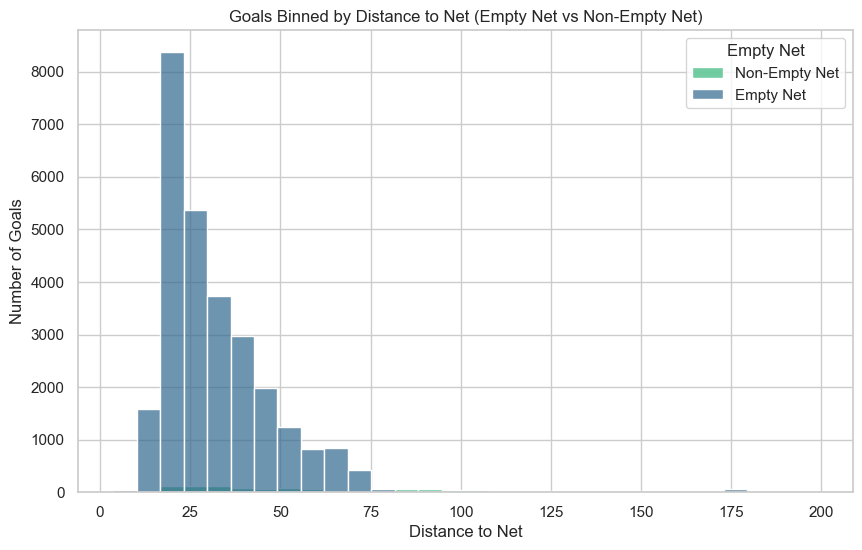

In [6]:
from ift6758.controller.nhl_shot_visualizer import NHLShotVisualizer

# Filter for goals only
goals_df = train_val_df[train_val_df['is_goal'] == 1]
visualizer = NHLShotVisualizer(goals_df)
visualizer.plot_goal_histogram()

In [7]:
# Define conditions for defensive zone goals using `home_team_defending_side`
defensive_goals = goals_df[
    (goals_df['is_goal'] == 1) & (
        ((goals_df['team_type'] == 'home') & 
         ((goals_df['home_team_defending_side'] == 'left') & (goals_df['x_coord'] < 0)) |
         ((goals_df['home_team_defending_side'] == 'right') & (goals_df['x_coord'] > 0))
        ) |
        ((goals_df['team_type'] == 'away') &
         ((goals_df['home_team_defending_side'] == 'left') & (goals_df['x_coord'] > 0)) |
         ((goals_df['home_team_defending_side'] == 'right') & (goals_df['x_coord'] < 0))
        )
    )
]

print(f"Defensive Zone Goals:\n{defensive_goals}")


Defensive Zone Goals:
           game_id   game_date  home_team_id  period time_in_period  event_id  \
49      2016020374  2016-12-04            16       3          13:06       664   
50      2016020374  2016-12-04            16       3          15:15       669   
60      2016020412  2016-12-10            26       1          03:10        11   
65      2016020412  2016-12-10            26       1          07:22        21   
92      2016020412  2016-12-10            26       3          12:39       533   
...            ...         ...           ...     ...            ...       ...   
305753  2019020517  2019-12-15            16       3          18:57       499   
305776  2019020259  2019-11-09            53       2          03:19       357   
305783  2019020259  2019-11-09            53       2          08:20       371   
305789  2019020259  2019-11-09            53       2          13:04       385   
305793  2019020259  2019-11-09            53       2          19:10       395   

     

In [8]:
defensive_goals

,game_id,game_date,home_team_id,period,time_in_period,event_id,event_type,is_goal,shot_type,x_coord,...,team_name,team_type,distance_to_net,angle_to_net,empty_net,strength_status,real_strength_home_vs_away,situation_code,shooter_id,goalie_id
49,2016020374,2016-12-04,16,3,13:06,664,goal,True,wrist,-73.0,...,Blackhawks,home,27.892651,165.465545,False,Equal Strength,5v5,1551,8478550,8476945
50,2016020374,2016-12-04,16,3,15:15,669,goal,True,wrist,62.0,...,Jets,away,46.615448,-35.394796,False,Equal Strength,5v5,1551,8477429,8474152
60,2016020412,2016-12-10,26,1,03:10,11,goal,True,wrist,-74.0,...,Kings,home,26.019224,-177.797402,False,Power Play,5v4,1451,8470604,8477237
65,2016020412,2016-12-10,26,1,07:22,21,goal,True,slap,-31.0,...,Kings,home,73.054774,160.820992,False,Power Play,5v4,1451,8474166,8477237
92,2016020412,2016-12-10,26,3,12:39,533,goal,True,wrist,-60.0,...,Kings,home,43.863424,155.772255,False,Power Play,5v4,1451,8468483,8477237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305753,2019020517,2019-12-15,16,3,18:57,499,goal,True,wrist,-3.0,...,Blackhawks,home,104.177733,158.607110,True,Penalty Kill,5v6,651,8474141,Unknown
305776,2019020259,2019-11-09,53,2,03:19,357,goal,True,snap,63.0,...,Wild,away,41.593269,-27.181111,False,Penalty Kill,4v5,1541,8469459,8475311
305783,2019020259,2019-11-09,53,2,08:20,371,goal,True,wrist,-59.0,...,Coyotes,home,48.020829,-148.626995,False,Equal Strength,5v5,1551,8476994,8471227
305789,2019020259,2019-11-09,53,2,13:04,385,goal,True,wrist,83.0,...,Wild,away,18.027756,19.440035,False,Equal Strength,5v5,1551,8477942,8475311


In [9]:
# Count goals by shot type
print(goals_df['shot_type'].value_counts())


shot_type
wrist          14995
snap            4328
slap            3008
backhand        2869
tip-in          2708
deflected        887
wrap-around      221
Unknown           16
Name: count, dtype: int64
